# import

In [4]:
import numpy as np
import pandas as pd
import math

In [5]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## (a) Pre-processing

#### import data

In [3]:
# make a list of column names of the data
cancer_columnnames = ['ID', 'class']
for i in range(1, 31):
    cancer_columnnames.append('feature'+str(i))
print(cancer_columnnames)

['ID', 'class', 'feature1', 'feature2', 'feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16', 'feature17', 'feature18', 'feature19', 'feature20', 'feature21', 'feature22', 'feature23', 'feature24', 'feature25', 'feature26', 'feature27', 'feature28', 'feature29', 'feature30']


In [4]:
cancer_rowdata = pd.read_csv('./wdbc.data', header = None, delimiter=',')
cancer_rowdata.head(3)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [5]:
# add the column names on the data
cancer_rowdata.columns = cancer_columnnames
# cancer_rowdata.index = cancer_rowdata['ID'].tolist()
# cancer_rowdata = cancer_rowdata.drop(columns = 'ID', axis = 0)
cancer_rowdata.head(3)

,ID,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [6]:
# drop the "ID" column
cancer_rowdata = cancer_rowdata.drop(columns = 'ID')
cancer_rowdata.head(3)

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### encoding

In [7]:
cancer_rowdata['class'] = cancer_rowdata['class'].replace(['B','M'], [0,1])
cancer_rowdata.head(3)

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


#### split into training and test set

In [8]:
# split the data by classes
cancer_rowdata_B = cancer_rowdata.loc[cancer_rowdata['class'] == 0]
cancer_rowdata_M = cancer_rowdata.loc[cancer_rowdata['class'] == 1]

In [9]:
# calculate the number of test data in each class
test_20_B = math.ceil(len(cancer_rowdata_B)*0.2)
test_20_M = math.ceil(len(cancer_rowdata_M)*0.2)
print('The number of Benigh(0) in test set is', test_20_B)
print('The number of Malignant(1) in test set is', test_20_M)

The number of Benigh(0) in test set is 72
The number of Malignant(1) in test set is 43


In [10]:
# select test data in each class and keep the rest as training data
cancer_test_B = cancer_rowdata_B.iloc[: test_20_B, :]
cancer_test_M = cancer_rowdata_M.iloc[: test_20_M, :]
cancer_train_B = cancer_rowdata_B.iloc[test_20_B :, :]
cancer_train_M = cancer_rowdata_M.iloc[test_20_M :, :]

In [11]:
# combine classes to the test set and training set
cancer_test = cancer_test_B.append(cancer_test_M).reset_index(drop=True)
cancer_train = cancer_train_B.append(cancer_train_M).reset_index(drop=True)

In [12]:
print('The size of test set is', cancer_test.shape)
print('The size of training set is', cancer_train.shape)

The size of test set is (115, 31)
The size of training set is (454, 31)


#### split the data into X and y

In [13]:
cancer_X_test = cancer_test.iloc[:, 1:]
cancer_y_test = cancer_test.iloc[:, :1]
cancer_X_train = cancer_train.iloc[:, 1:]
cancer_y_train = cancer_train.iloc[:, :1]

#### normalize data

In [14]:
# normalize X of training and test data, get arrays
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
cancer_X_train_normalized = min_max_scaler.fit_transform(cancer_X_train)
cancer_X_test_normalized = min_max_scaler.transform(cancer_X_test)

In [15]:
# transfer arrays to dataframes
cancer_X_train_normalized = pd.DataFrame(cancer_X_train_normalized)
cancer_X_train_normalized.columns = cancer_X_train.columns
cancer_X_test_normalized = pd.DataFrame(cancer_X_test_normalized)
cancer_X_test_normalized.columns = cancer_X_test.columns

In [16]:
cancer_X_train_normalized.head(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,0.223272,0.278323,0.215891,0.124389,0.306130,0.145421,0.091026,0.115855,0.492958,0.269054,...,0.179519,0.351812,0.163235,0.084508,0.333686,0.166383,0.166068,0.282165,0.367633,0.292091
1,0.448063,0.329726,0.430218,0.304557,0.196985,0.162107,0.120665,0.137724,0.424702,0.059402,...,0.348732,0.427772,0.334553,0.200576,0.109423,0.157817,0.160855,0.289897,0.228375,0.050453
2,0.213967,0.102469,0.205719,0.119368,0.365442,0.101313,0.046204,0.097565,0.287107,0.198952,...,0.163073,0.170309,0.150424,0.076717,0.371987,0.105325,0.073812,0.241409,0.225285,0.265913


In [17]:
# concat training and test sets
cancer_train = pd.concat([cancer_y_train, cancer_X_train_normalized], axis=1)
cancer_train.columns = cancer_rowdata.columns
cancer_test = pd.concat([cancer_y_test, cancer_X_test_normalized], axis=1)
cancer_test.columns = cancer_rowdata.columns


In [18]:
cancer_train.head(3)

,class,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30
0,0,0.223272,0.278323,0.215891,0.124389,0.306130,0.145421,0.091026,0.115855,0.492958,...,0.179519,0.351812,0.163235,0.084508,0.333686,0.166383,0.166068,0.282165,0.367633,0.292091
1,0,0.448063,0.329726,0.430218,0.304557,0.196985,0.162107,0.120665,0.137724,0.424702,...,0.348732,0.427772,0.334553,0.200576,0.109423,0.157817,0.160855,0.289897,0.228375,0.050453
2,0,0.213967,0.102469,0.205719,0.119368,0.365442,0.101313,0.046204,0.097565,0.287107,...,0.163073,0.170309,0.150424,0.076717,0.371987,0.105325,0.073812,0.241409,0.225285,0.265913


## (b) Monte-Carlo Simulation

In [19]:
cancer_data = cancer_rowdata
cancer_data.shape

(569, 31)

In [20]:
# create a function to randomly generate training and test datasets

def generate_train_test_data(cancer_data, test_size=0.2):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import MinMaxScaler
    
    # split the data to training and test set
    cancer_data_M = cancer_data.loc[cancer_data['class']==1]
    cancer_data_B = cancer_data.loc[cancer_data['class']==0]
    cancer_data_M_train, cancer_data_M_test = train_test_split(cancer_data_M, test_size=test_size)
    cancer_data_B_train, cancer_data_B_test = train_test_split(cancer_data_B, test_size=test_size)
    cancer_data_train = cancer_data_M_train.append(cancer_data_B_train).reset_index(drop=True)
    cancer_data_test = cancer_data_M_test.append(cancer_data_B_test).reset_index(drop=True)
    
    # normalize X in training and test sets
    min_max_scaler = MinMaxScaler()
    
    cancer_data_X_train = cancer_data_train.iloc[:, 1:]
    cancer_data_y_train = cancer_data_train.iloc[:, 0]
    cancer_data_X_train_normalized = min_max_scaler.fit_transform(cancer_data_X_train)
    cancer_data_X_train_normalized = pd.DataFrame(cancer_data_X_train_normalized)
    cancer_data_X_train_normalized.columns = cancer_data_X_train.columns
    
    cancer_data_X_test = cancer_data_test.iloc[:, 1:]
    cancer_data_y_test = cancer_data_test.iloc[:, 0]
    cancer_data_X_test_normalized = min_max_scaler.transform(cancer_data_X_test)
    cancer_data_X_test_normalized = pd.DataFrame(cancer_data_X_test_normalized)
    cancer_data_X_test_normalized.columns = cancer_data_X_test.columns
    
    # concat training and test sets
    cancer_data_train = pd.concat([cancer_data_y_train, cancer_data_X_train_normalized], axis=1)
    cancer_data_train.columns = cancer_data.columns
    cancer_data_test = pd.concat([cancer_data_y_test, cancer_data_X_test_normalized], axis=1)
    cancer_data_test.columns = cancer_data.columns

    return(cancer_data_train, cancer_data_test)

In [21]:
# create a function to split a dataset to X and y

def split_X_y(cancer_data):
    cancer_data_X = cancer_data.iloc[:, 1:]
    cancer_data_y = cancer_data.iloc[:, :1]
    return(cancer_data_X, cancer_data_y)

In [22]:
# create a function to report average scores

def report1(cancer_data_y, cancer_data_y_pred):
    
    # accuracy
    from sklearn.metrics import accuracy_score
    cancer_accuracy = accuracy_score(cancer_data_y, cancer_data_y_pred)
    
    # precision
    from sklearn.metrics import precision_score
    cancer_precision = precision_score(cancer_data_y, cancer_data_y_pred, average='binary')
    
    # recall
    from sklearn.metrics import recall_score
    cancer_recall = recall_score(cancer_data_y, cancer_data_y_pred, average='binary')
    
    # F-score
    from sklearn.metrics import f1_score
    cancer_fscore = f1_score(cancer_data_y, cancer_data_y_pred, average='binary')
    
    # AUC
    from sklearn import metrics
    fpr, tpr, thresholds = metrics.roc_curve(cancer_data_y, cancer_data_y_pred)
    cancer_AUC = metrics.auc(fpr, tpr)
    
    cancer_result = pd.Series([cancer_accuracy, cancer_precision, cancer_recall, cancer_fscore, cancer_AUC])
    return(cancer_result)

In [23]:
# create a class to implement ROC plot

class LinearSVC_proba(LinearSVC):

    def __platt_func(self,x):
        return 1/(1+np.exp(-x))

    def predict_proba(self, X):
        f = np.vectorize(self.__platt_func)
        raw_predictions = self.decision_function(X)
        proba = f(raw_predictions)
        return(proba)

In [24]:
# create a function to calculate prediction probabilities for each class in order to implement ROC plot

def proba_array(y_proba):
    proba_array=[]
    for i in range(len(y_proba)):
        ai = (1-y_proba[i],y_proba[i])
        proba_array.append(ai)
    proba_array = np.array(proba_array)
    return(proba_array)

In [25]:
# create a function to report the ROC and the confusion matrix

def report2(cancer_data_y, cancer_data_y_pred, cancer_data_y_proba):
    import matplotlib.pyplot as plt
    import scikitplot as skplt
    from sklearn.metrics import confusion_matrix

    print('The ROC of this classifier is')
    skplt.metrics.plot_roc(cancer_data_y, cancer_data_y_proba)
    plt.show()

    print('The confusion matrix of this classifier is\n',
          confusion_matrix(cancer_data_y, cancer_data_y_pred),'\n')

### i Supervised Learning

In [41]:
cancer_data_train_su, cancer_data_test_su = generate_train_test_data(cancer_data)
cancer_data_X_train_su, cancer_data_y_train_su = split_X_y(cancer_data_train_su)
cancer_data_X_test_su, cancer_data_y_test_su = split_X_y(cancer_data_test_su)

In [42]:
svc_su = LinearSVC(penalty='l1', dual=False)
params = {'C':[np.float_power(10, i) for i in range(2,-3,-1)]}

In [43]:
gscv_svc_su = GridSearchCV(svc_su, params, n_jobs=-1, cv=5)

In [44]:
gscv_svc_su.fit(cancer_data_X_train_su, cancer_data_y_train_su)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [100.0, 10.0, 1.0, 0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [45]:
bestC_svc_su = gscv_svc_su.best_params_['C']

In [46]:
bestC_svc_su

1.0

In [47]:
best_svc_su = LinearSVC_proba(penalty='l1', dual=False, C = bestC_svc_su)
best_svc_su.fit(cancer_data_X_train_su, cancer_data_y_train_su)

LinearSVC_proba(C=1.0, class_weight=None, dual=False, fit_intercept=True,
        intercept_scaling=1, loss='squared_hinge', max_iter=1000,
        multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
        verbose=0)

In [48]:
cancer_data_y_train_su_predict = best_svc_su.predict(cancer_data_X_train_su)
cancer_data_y_train_su_proba = best_svc_su.predict_proba(cancer_data_X_train_su)
cancer_data_y_train_su_proba_array = proba_array(cancer_data_y_train_su_proba)

In [49]:
cancer_data_y_test_su_predict = best_svc_su.predict(cancer_data_X_test_su)
cancer_data_y_test_su_proba = best_svc_su.predict_proba(cancer_data_X_test_su)
cancer_data_y_test_su_proba_array = proba_array(cancer_data_y_test_su_proba)

The ROC of this classifier is


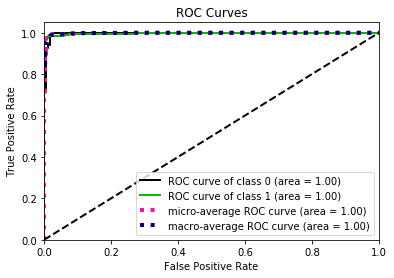

The confusion matrix of this classifier is
 [[282   3]
 [  4 165]] 



In [103]:
# the ROC and the confusion matrix of the last iteration
report2(cancer_data_y_train_su, cancer_data_y_train_su_predict, cancer_data_y_train_su_proba_array)

The ROC of this classifier is


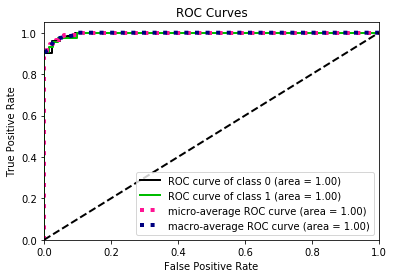

The confusion matrix of this classifier is
 [[72  0]
 [ 4 39]] 



In [51]:
report2(cancer_data_y_test_su, cancer_data_y_test_su_predict, cancer_data_y_test_su_proba_array)


In [52]:
# create a function to show the average scores report of each iteration with the best parameter for LinearSVC selected by 5-fold cross valitation  

def svc_su():
    import warnings
    warnings.filterwarnings('ignore')
    
    # split the data
    cancer_data_train_su, cancer_data_test_su = generate_train_test_data(cancer_data)
    cancer_data_X_train_su, cancer_data_y_train_su = split_X_y(cancer_data_train_su)
    cancer_data_X_test_su, cancer_data_y_test_su = split_X_y(cancer_data_test_su)
    
    # cross validation
    svc_su = LinearSVC(penalty='l1', dual=False)
    params = {'C':[np.float_power(10, i) for i in range(2,-3,-1)]}
    gscv_svc_su = GridSearchCV(svc_su, params, n_jobs=-1, cv=5)
    gscv_svc_su.fit(cancer_data_X_train_su, cancer_data_y_train_su)
    bestC_svc_su = gscv_svc_su.best_params_['C']
    
    # fit the classifier with the best C
    best_svc_su = LinearSVC_proba(penalty='l1', dual=False, C = bestC_svc_su)
    best_svc_su.fit(cancer_data_X_train_su, cancer_data_y_train_su)
    
    # calculations
    cancer_data_y_train_su_predict = best_svc_su.predict(cancer_data_X_train_su)
    cancer_data_y_train_su_proba = best_svc_su.predict_proba(cancer_data_X_train_su)
    cancer_data_y_train_su_proba_array = proba_array(cancer_data_y_train_su_proba)
    
    cancer_data_y_test_su_predict = best_svc_su.predict(cancer_data_X_test_su)
    cancer_data_y_test_su_proba = best_svc_su.predict_proba(cancer_data_X_test_su)
    cancer_data_y_test_su_proba_array = proba_array(cancer_data_y_test_su_proba)
    
    # report the average scores
    cancer_result_train = report1(cancer_data_y_train_su, cancer_data_y_train_su_predict)
    cancer_result_test = report1(cancer_data_y_test_su, cancer_data_y_test_su_predict)
    cancer_result = cancer_result_train.append(cancer_result_test)
    
    return(cancer_result)

In [53]:
# repeat for 30 times
cancer_result_list = []
for i in range(1,31):
    cancer_result_list.append(svc_su())

In [54]:
# combine each results of report1 for the 30-time iterations
cancer_svc_su_report1 = pd.concat(cancer_result_list, axis=1).T
cancer_svc_su_report1_columns = ['cancer_train_accuracy', 'cancer_train_precision', 'cancer_train_recall', 'cancer_train_fscore', 'cancer_train_AUC',
                          'cancer_test_accuracy', 'cancer_test_precision', 'cancer_test_recall', 'cancer_test_fscore', 'cancer_test_AUC']
cancer_svc_su_report1.columns = cancer_svc_su_report1_columns
cancer_svc_su_report1


,cancer_train_accuracy,cancer_train_precision,cancer_train_recall,cancer_train_fscore,cancer_train_AUC,cancer_test_accuracy,cancer_test_precision,cancer_test_recall,cancer_test_fscore,cancer_test_AUC
0,0.982379,0.982036,0.970414,0.976190,0.979944,0.982609,0.955556,1.000000,0.977273,0.986111
1,0.984581,0.982143,0.976331,0.979228,0.982903,0.973913,1.000000,0.930233,0.963855,0.965116
2,0.988987,0.993976,0.976331,0.985075,0.986411,0.982609,1.000000,0.953488,0.976190,0.976744
3,0.986784,0.988024,0.976331,0.982143,0.984657,0.956522,0.952381,0.930233,0.941176,0.951227
4,0.984581,0.993902,0.964497,0.978979,0.980494,0.973913,1.000000,0.930233,0.963855,0.965116
5,0.982379,0.993865,0.958580,0.975904,0.977536,0.973913,1.000000,0.930233,0.963855,0.965116
6,0.988987,0.993976,0.976331,0.985075,0.986411,0.939130,1.000000,0.837209,0.911392,0.918605
7,0.986784,0.993939,0.970414,0.982036,0.983453,0.965217,1.000000,0.906977,0.951220,0.953488
8,0.984581,0.987952,0.970414,0.979104,0.981698,0.991304,1.000000,0.976744,0.988235,0.988372
9,0.995595,1.000000,0.988166,0.994048,0.994083,0.965217,0.975610,0.930233,0.952381,0.958172


#### Report

In [55]:
# average scores of training and test set
for i in range(10):
    print('The average of', cancer_svc_su_report1.columns[i], 'is', cancer_svc_su_report1.iloc[:, i].mean())


The average of cancer_train_accuracy is 0.9867841409691633
The average of cancer_train_precision is 0.9905809474408697
The average of cancer_train_recall is 0.9737672583826424
The average of cancer_train_fscore is 0.9820826472164373
The average of cancer_train_AUC is 0.9841350911796258
The average of cancer_test_accuracy is 0.9657971014492752
The average of cancer_test_precision is 0.9785253071228681
The average of cancer_test_recall is 0.9294573643410856
The average of cancer_test_fscore is 0.9529347118909371
The average of cancer_test_AUC is 0.9584786821705428


### ii Semi-Supervised Learning/ Self-training

In [56]:
# generate train and test set 
# cancer_train_svc_se, cancer_test_svc_se = generate_train_test_data(cancer_data)

In [57]:
# create a function to randomly split labeled data and unlabeled data

def split_to_50_50(cancer_train_data, unlabeled_size=0.5):
    from sklearn.model_selection import train_test_split
    
    cancer_data = cancer_train_data
    # split the data
    cancer_data_M = cancer_data.loc[cancer_data['class']==1]
    cancer_data_B = cancer_data.loc[cancer_data['class']==0]
    cancer_data_M_labeled, cancer_data_M_unlabeled = train_test_split(cancer_data_M, test_size=unlabeled_size)
    cancer_data_B_labeled, cancer_data_B_unlabeled = train_test_split(cancer_data_B, test_size=unlabeled_size)
    cancer_data_labeled = cancer_data_M_labeled.append(cancer_data_B_labeled).reset_index(drop=True)
    cancer_data_unlabeled = cancer_data_M_unlabeled.append(cancer_data_B_unlabeled).reset_index(drop=True)
    return(cancer_data_labeled, cancer_data_unlabeled)


#### A Train an L1-penalized SVM to classify the labeled data

In [58]:
# generate labeled and unlabeled datasets for training data
cancer_train_svc_se_labeled, cancer_train_svc_se_unlabeled = split_to_50_50(cancer_train)

In [59]:
print('The size of labeled dataset is', cancer_train_svc_se_labeled.shape)
print('The size of unlabeled dataset is', cancer_train_svc_se_unlabeled.shape)

The size of labeled dataset is (226, 31)
The size of unlabeled dataset is (228, 31)


In [60]:
cancer_train_svc_se_labeled_X, cancer_train_svc_se_labeled_y = split_X_y(cancer_train_svc_se_labeled)
cancer_train_svc_se_unlabeled_X, cancer_train_svc_se_unlabeled_y = split_X_y(cancer_train_svc_se_unlabeled)
cancer_test_svc_se_X, cancer_test_svc_se_y =split_X_y(cancer_test)


In [372]:
# create a function to build a SVC classifier with the best parameter selected by 5-fold cross valitation  

def svc(cancer_data_train_svc,cv=5):
    import warnings
    warnings.filterwarnings('ignore')
    
    # split the data
#     cancer_data_train_svc, cancer_data_test_svc = generate_train_test_data(cancer_data)
    cancer_data_X_train_svc, cancer_data_y_train_svc = split_X_y(cancer_data_train_svc)
#     cancer_data_X_test_svc, cancer_data_y_test_svc = split_X_y(cancer_data_test_svc)
    
    # cross validation
    svc_clf = LinearSVC(penalty='l1', dual=False)
    params = {'C':[np.float_power(10, i) for i in range(2,-3,-1)]}
    gscv_svc = GridSearchCV(svc_clf, params, n_jobs=-1, cv=cv)
    gscv_svc.fit(cancer_data_X_train_svc, cancer_data_y_train_svc)
    bestC_svc = gscv_svc.best_params_['C']
    
    # fit the classifier with the best C
    best_svc = LinearSVC_proba(penalty='l1', dual=False, C = bestC_svc)
    best_svc.fit(cancer_data_X_train_svc, cancer_data_y_train_svc)
    
    return(best_svc)

In [62]:
best_svc_se = svc(cancer_train_svc_se_labeled)

#### B Retrain SVM using updating labeled dataset

In [63]:

while cancer_train_svc_se_unlabeled_X.empty == False:
#     best_svc_se = svc(cancer_train_svc_se_labeled)
    cancer_train_svc_se_unlabeled_y_pred = best_svc_se.predict(cancer_train_svc_se_unlabeled_X)
    cancer_svc_se_distance = best_svc_se.decision_function(cancer_train_svc_se_unlabeled_X)
    cancer_svc_se_distance_abs = abs(cancer_svc_se_distance)
    x = list(range(len(cancer_svc_se_distance_abs)))
    cancer_svc_se_dict = dict(zip(x, cancer_svc_se_distance_abs))
    cancer_svc_se_dict_maxkey = max(cancer_svc_se_dict, key=cancer_svc_se_dict.get)
    y_add = cancer_train_svc_se_unlabeled_y_pred[cancer_svc_se_dict_maxkey]
    X_add = cancer_train_svc_se_unlabeled_X.iloc[cancer_svc_se_dict_maxkey, :]
    cancer_train_svc_se_labeled_X = cancer_train_svc_se_labeled_X.append(X_add).reset_index(drop = True)
    cancer_train_svc_se_labeled_y = cancer_train_svc_se_labeled_y.append(pd.DataFrame([y_add],columns=['class'])).reset_index(drop = True)
    cancer_train_svc_se_unlabeled_X = cancer_train_svc_se_unlabeled_X.drop(index=[cancer_svc_se_dict_maxkey]).reset_index(drop = True)
    cancer_train_svc_se_unlabeled_y = cancer_train_svc_se_unlabeled_y.drop(index=[cancer_svc_se_dict_maxkey]).reset_index(drop = True)



In [64]:
cancer_train_svc_se_labeled_X.shape

(454, 30)

In [65]:
best_svc_se.fit(cancer_train_svc_se_labeled_X, cancer_train_svc_se_labeled_y)


LinearSVC_proba(C=1.0, class_weight=None, dual=False, fit_intercept=True,
        intercept_scaling=1, loss='squared_hinge', max_iter=1000,
        multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
        verbose=0)

In [66]:
def cancer_result(cancer_data_X_train_se, cancer_data_X_test_se, cancer_data_y_train_se, cancer_data_y_test_se, best_svc_se):
    
    # calculations
    cancer_data_y_train_se_predict = best_svc_se.predict(cancer_data_X_train_se)
    cancer_data_y_train_se_proba = best_svc_se.predict_proba(cancer_data_X_train_se)
    cancer_data_y_train_se_proba_array = proba_array(cancer_data_y_train_se_proba)
    
    cancer_data_y_test_se_predict = best_svc_se.predict(cancer_data_X_test_se)
    cancer_data_y_test_se_proba = best_svc_se.predict_proba(cancer_data_X_test_se)
    cancer_data_y_test_se_proba_array = proba_array(cancer_data_y_test_se_proba)
    
    # report the average scores
    cancer_result_train = report1(cancer_data_y_train_se, cancer_data_y_train_se_predict)
    cancer_result_test = report1(cancer_data_y_test_se, cancer_data_y_test_se_predict)
    cancer_result = cancer_result_train.append(cancer_result_test)
    
    return(cancer_result)

In [67]:
# cancer_result(cancer_train_svc_se_labeled_X, cancer_test_svc_se_X, cancer_train_svc_se_labeled_y, cancer_test_svc_se_y, best_svc_se)


In [68]:
def draw_roc_matrix(cancer_data_X_train_se, cancer_data_X_test_se, cancer_data_y_train_se, cancer_data_y_test_se, best_svc_se):
    cancer_data_y_train_se_predict = best_svc_se.predict(cancer_data_X_train_se)
    cancer_data_y_train_se_proba = best_svc_se.predict_proba(cancer_data_X_train_se)
    cancer_data_y_train_se_proba_array = proba_array(cancer_data_y_train_se_proba)
    
    cancer_data_y_test_se_predict = best_svc_se.predict(cancer_data_X_test_se)
    cancer_data_y_test_se_proba = best_svc_se.predict_proba(cancer_data_X_test_se)
    cancer_data_y_test_se_proba_array = proba_array(cancer_data_y_test_se_proba)
    
    report2(cancer_data_y_train_se, cancer_data_y_train_se_predict, cancer_data_y_train_se_proba_array)
    report2(cancer_data_y_test_se, cancer_data_y_test_se_predict, cancer_data_y_test_se_proba_array)

#### Report ROC and confusion matrix

The ROC of this classifier is


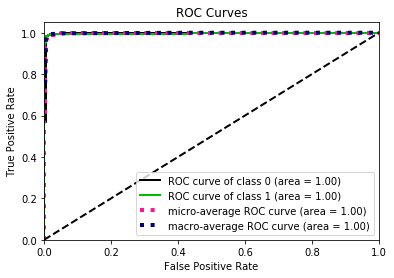

The confusion matrix of this classifier is
 [[286   2]
 [  4 162]] 

The ROC of this classifier is


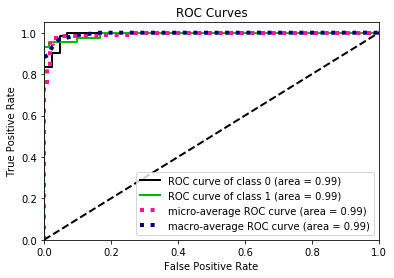

The confusion matrix of this classifier is
 [[72  0]
 [ 3 40]] 



In [69]:
draw_roc_matrix(cancer_train_svc_se_labeled_X, cancer_test_svc_se_X, cancer_train_svc_se_labeled_y, cancer_test_svc_se_y, best_svc_se)


In [71]:
def svc_se():
    cancer_train_svc_se_labeled, cancer_train_svc_se_unlabeled = split_to_50_50(cancer_train)
    cancer_train_svc_se_labeled_X, cancer_train_svc_se_labeled_y = split_X_y(cancer_train_svc_se_labeled)
    cancer_train_svc_se_unlabeled_X, cancer_train_svc_se_unlabeled_y = split_X_y(cancer_train_svc_se_unlabeled)
    cancer_test_svc_se_X, cancer_test_svc_se_y =split_X_y(cancer_test)
    
    best_svc_se = svc(cancer_train_svc_se_labeled)
       
    while cancer_train_svc_se_unlabeled_X.empty == False:
        cancer_train_svc_se_unlabeled_y_pred = best_svc_se.predict(cancer_train_svc_se_unlabeled_X)
        cancer_svc_se_distance = best_svc_se.decision_function(cancer_train_svc_se_unlabeled_X)
        cancer_svc_se_distance_abs = abs(cancer_svc_se_distance)
        x = list(range(len(cancer_svc_se_distance_abs)))
        cancer_svc_se_dict = dict(zip(x, cancer_svc_se_distance_abs))
        cancer_svc_se_dict_maxkey = max(cancer_svc_se_dict, key=cancer_svc_se_dict.get)
        y_add = cancer_train_svc_se_unlabeled_y_pred[cancer_svc_se_dict_maxkey]
        X_add = cancer_train_svc_se_unlabeled_X.iloc[cancer_svc_se_dict_maxkey, :]
        cancer_train_svc_se_labeled_X = cancer_train_svc_se_labeled_X.append(X_add).reset_index(drop = True)
        cancer_train_svc_se_labeled_y = cancer_train_svc_se_labeled_y.append(pd.DataFrame([y_add],columns=['class'])).reset_index(drop = True)
        cancer_train_svc_se_unlabeled_X = cancer_train_svc_se_unlabeled_X.drop(index=[cancer_svc_se_dict_maxkey]).reset_index(drop = True)
        cancer_train_svc_se_unlabeled_y = cancer_train_svc_se_unlabeled_y.drop(index=[cancer_svc_se_dict_maxkey]).reset_index(drop = True)

    best_svc_se.fit(cancer_train_svc_se_labeled_X, cancer_train_svc_se_labeled_y)
    cancer_result_se = cancer_result(cancer_train_svc_se_labeled_X, cancer_test_svc_se_X, cancer_train_svc_se_labeled_y, cancer_test_svc_se_y, best_svc_se)
    
    return(cancer_result_se)

In [72]:
# repeat for 30 times
cancer_result_list_se = []
for i in range(1,31):
    cancer_result_list_se.append(svc_se())

In [73]:
# combine each results of report1 for the 30-time iterations
cancer_svc_se_report1 = pd.concat(cancer_result_list_se, axis=1).T
cancer_svc_se_report1_columns = ['cancer_train_accuracy', 'cancer_train_precision', 'cancer_train_recall', 'cancer_train_fscore', 'cancer_train_AUC',
                          'cancer_test_accuracy', 'cancer_test_precision', 'cancer_test_recall', 'cancer_test_fscore', 'cancer_test_AUC']
cancer_svc_se_report1.columns = cancer_svc_se_report1_columns
cancer_svc_se_report1


,cancer_train_accuracy,cancer_train_precision,cancer_train_recall,cancer_train_fscore,cancer_train_AUC,cancer_test_accuracy,cancer_test_precision,cancer_test_recall,cancer_test_fscore,cancer_test_AUC
0,1.000000,1.000000,1.000000,1.000000,1.000000,0.965217,0.975610,0.930233,0.952381,0.958172
1,0.988987,1.000000,0.970588,0.985075,0.985294,0.956522,0.931818,0.953488,0.942529,0.955911
2,0.993392,1.000000,0.980892,0.990354,0.990446,0.956522,0.975000,0.906977,0.939759,0.946544
3,0.997797,1.000000,0.994220,0.997101,0.997110,0.965217,0.953488,0.953488,0.953488,0.962855
4,0.988987,1.000000,0.969512,0.984520,0.984756,0.956522,0.952381,0.930233,0.941176,0.951227
5,0.984581,0.988024,0.970588,0.979228,0.981773,0.973913,0.976190,0.953488,0.964706,0.969800
6,0.991189,0.987578,0.987578,0.987578,0.990376,0.965217,1.000000,0.906977,0.951220,0.953488
7,0.984581,1.000000,0.957055,0.978056,0.978528,0.956522,0.975000,0.906977,0.939759,0.946544
8,0.980176,0.987421,0.957317,0.972136,0.975210,0.973913,1.000000,0.930233,0.963855,0.965116
9,0.986784,0.993865,0.970060,0.981818,0.983288,0.965217,0.975610,0.930233,0.952381,0.958172


#### Report accuracy scores

In [74]:
# average scores of training and test set
for i in range(10):
    print('The average of', cancer_svc_se_report1.columns[i], 'is', cancer_svc_se_report1.iloc[:, i].mean())


The average of cancer_train_accuracy is 0.9912628487518358
The average of cancer_train_precision is 0.9965163258280201
The average of cancer_train_recall is 0.9794596051909341
The average of cancer_train_fscore is 0.9878700366945293
The average of cancer_train_AUC is 0.9887483189808443
The average of cancer_test_accuracy is 0.9634782608695648
The average of cancer_test_precision is 0.9668631559088169
The average of cancer_test_recall is 0.9348837209302329
The average of cancer_test_fscore is 0.9503620623405207
The average of cancer_test_AUC is 0.9577196382428942


In [77]:
# best_svc_se = svc(cancer_train_svc_se_labeled)

In [79]:
# cancer_train_svc_se_unlabeled_y_pred = best_svc_se.predict(cancer_train_svc_se_unlabeled_X)

In [80]:
# cancer_svc_se_distance = best_svc_se.decision_function(cancer_train_svc_se_unlabeled_X)

In [174]:
# cancer_svc_se_distance

In [173]:
# cancer_svc_se_distance_abs = abs(cancer_svc_se_distance)
# cancer_svc_se_distance_abs

In [92]:
# x = list(range(len(cancer_svc_se_distance_abs)))


In [172]:
# cancer_svc_se_dict = dict(zip(x, cancer_svc_se_distance_abs))
# cancer_svc_se_dict

In [95]:
# cancer_svc_se_dict_maxkey = max(cancer_svc_se_dict, key=cancer_svc_se_dict.get)

In [100]:
# y_add = cancer_train_svc_se_unlabeled_y_pred[cancer_svc_se_dict_maxkey]

In [101]:
# X_add = cancer_train_svc_se_unlabeled_X.iloc[cancer_svc_se_dict_maxkey, :]

In [125]:
# cancer_train_svc_se_labeled_X = cancer_train_svc_se_labeled_X.append(X_add).reset_index(drop = True)
# cancer_train_svc_se_labeled_y = cancer_train_svc_se_labeled_y.append(pd.DataFrame([y_add],columns=['class'])).reset_index(drop = True)

In [170]:
# cancer_train_svc_se_unlabeled_X = cancer_train_svc_se_unlabeled_X.drop(index=[cancer_svc_se_dict_maxkey]).reset_index(drop = True)
# cancer_train_svc_se_unlabeled_y = cancer_train_svc_se_unlabeled_y.drop(index=[cancer_svc_se_dict_maxkey]).reset_index(drop = True)



In [171]:
# cancer_train_svc_se_unlabeled_X

### iii. Unsupervised Learning

#### A k-means

In [75]:
from sklearn.cluster import KMeans

In [76]:
cancer_km_score = []
for i in range(1,31):
    kmeans_i = KMeans(n_clusters=2).fit(cancer_X_train)
    kmeans_i_score = kmeans_i.score(cancer_X_train)
    cancer_km_score.append(kmeans_i_score)
cancer_km_score = pd.DataFrame(cancer_km_score, columns = ['score'])
print(cancer_km_score)

           score
0  -6.671427e+07
1  -6.671427e+07
2  -6.671427e+07
3  -6.671427e+07
4  -6.671427e+07
5  -6.671427e+07
6  -6.671427e+07
7  -6.671427e+07
8  -6.671427e+07
9  -6.671427e+07
10 -6.671427e+07
11 -6.671427e+07
12 -6.671427e+07
13 -6.671427e+07
14 -6.671427e+07
15 -6.671427e+07
16 -6.671427e+07
17 -6.671427e+07
18 -6.671427e+07
19 -6.671427e+07
20 -6.671427e+07
21 -6.671427e+07
22 -6.671427e+07
23 -6.671427e+07
24 -6.671427e+07
25 -6.671427e+07
26 -6.671427e+07
27 -6.671427e+07
28 -6.671427e+07
29 -6.671427e+07


**Research**


- To avoid local minimum, we should run kmeans randomly as much as possible. 

- Trying all the random assignments will be the best solution, which can find the best classifier.

- However, this approach leads to time-consuming and is not very smart.


#### BC majority poll

In [77]:
# calculate the distances of points
kmeans = KMeans(n_clusters=2).fit(cancer_X_train_normalized)
cancer_y_train_pred = kmeans.predict(cancer_X_train_normalized)
kmeans_center = kmeans.transform(cancer_X_train_normalized)

In [78]:
len(cancer_y_train_pred)

454

In [79]:
kmeans_center.shape

(454, 2)

In [80]:
cancer_y_train_pred = pd.DataFrame(cancer_y_train_pred, columns = ['cluster'])

In [81]:
kmeans_center = pd.DataFrame(kmeans_center, columns = ['0_distance', '1_distance'])

In [82]:
kmeans_lookup = pd.concat([cancer_y_train_pred, kmeans_center], axis = 1)

In [83]:
kmeans_lookup_0 = kmeans_lookup[kmeans_lookup['cluster'] == 0]

In [84]:
kmeans_lookup_0_list = []
for i in range(30):
    index_i = kmeans_lookup_0['0_distance'].argmin()
    kmeans_lookup_0_list.append(index_i)
    kmeans_lookup_0 = kmeans_lookup_0.drop(index = [index_i])
print(kmeans_lookup_0_list)

[129, 154, 29, 0, 132, 184, 203, 53, 76, 266, 183, 102, 35, 101, 157, 84, 218, 23, 221, 267, 54, 149, 232, 24, 116, 171, 164, 18, 128, 159]


In [85]:
kmeans_lookup_1 = kmeans_lookup[kmeans_lookup['cluster'] == 1]

In [86]:
kmeans_lookup_1_list = []
for i in range(30):
    index_i = kmeans_lookup_1['1_distance'].argmin()
    kmeans_lookup_1_list.append(index_i)
    kmeans_lookup_1 = kmeans_lookup_1.drop(index = [index_i])
print(kmeans_lookup_1_list)

[421, 432, 413, 416, 435, 365, 325, 333, 436, 313, 385, 397, 384, 442, 443, 393, 317, 287, 304, 305, 356, 420, 300, 388, 434, 330, 446, 302, 386, 369]


In [87]:
kmeans_lookup_0_true  = cancer_y_train.iloc[kmeans_lookup_0_list]
kmeans_lookup_1_true  = cancer_y_train.iloc[kmeans_lookup_1_list]

In [88]:
cluster_0 = kmeans_lookup_0_true.iloc[:,0].value_counts().idxmax()

In [89]:
cluster_1 = kmeans_lookup_1_true.iloc[:,0].value_counts().idxmax()

In [90]:
cancer_y_train_pred_modified = cancer_y_train_pred['cluster'].replace([0, 1], [cluster_0, cluster_1])


In [91]:
cancer_y_test_pred = kmeans.predict(cancer_X_test_normalized)
cancer_y_test_pred = pd.DataFrame(cancer_y_test_pred, columns = ['cluster'])

In [92]:
cancer_y_test_pred_modified = cancer_y_test_pred['cluster'].replace([0, 1], [cluster_0, cluster_1])


In [93]:
def distance_to_proba(distance):
    for i in range(distance.shape[0]):
        a = distance.iloc[i,1]/(distance.iloc[i,0]+distance.iloc[i,1])
        b = distance.iloc[i,0]/(distance.iloc[i,0]+distance.iloc[i,1])
        distance.iloc[i,0] = a
        distance.iloc[i,1] = b
        distance.columns = ['%d_proba' % (cluster_0),'%d_proba' % (cluster_1)]
    return(distance)

In [94]:
cancer_y_train_km_proba_array = distance_to_proba(kmeans_center)

In [95]:
kmeans_center_test = pd.DataFrame(kmeans.transform(cancer_X_test_normalized))
cancer_y_test_km_proba_array = distance_to_proba(kmeans_center_test)

#### Report

The ROC of this classifier is


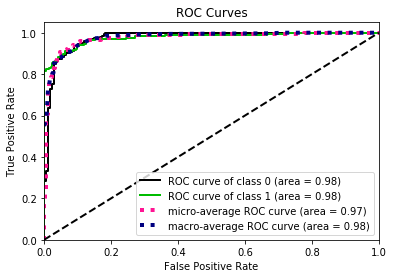

The confusion matrix of this classifier is
 [[277   8]
 [ 25 144]] 

The ROC of this classifier is


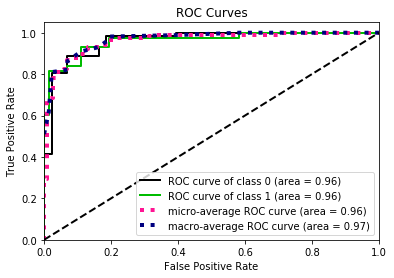

The confusion matrix of this classifier is
 [[67  5]
 [ 7 36]] 



In [96]:

report2(cancer_y_train, cancer_y_train_pred_modified, cancer_y_train_km_proba_array)
report2(cancer_y_test, cancer_y_test_pred_modified, cancer_y_test_km_proba_array)


In [97]:
def cancer_result_km(cancer_data_X_train_km, cancer_data_X_test_km, cancer_data_y_train_km, cancer_data_y_test_km, kmeans):
    
    # calculations
    # for training set
    cancer_data_y_train_km_predict = kmeans.predict(cancer_data_X_train_km)
    cancer_data_y_train_km_predict = pd.DataFrame(cancer_data_y_train_km_predict, columns = ['cluster'])

    kmeans_center = kmeans.transform(cancer_data_X_train_km)
    kmeans_center = pd.DataFrame(kmeans_center, columns = ['0_distance', '1_distance'])
    
    
    kmeans_lookup = pd.concat([cancer_data_y_train_km_predict, kmeans_center], axis = 1)
    
    kmeans_lookup_0 = kmeans_lookup[kmeans_lookup['cluster'] == 0]
    kmeans_lookup_0_list = []
    for i in range(30):
        index_i = kmeans_lookup_0['0_distance'].argmin()
        kmeans_lookup_0_list.append(index_i)
        kmeans_lookup_0 = kmeans_lookup_0.drop(index = [index_i])

    kmeans_lookup_1 = kmeans_lookup[kmeans_lookup['cluster'] == 1]
    kmeans_lookup_1_list = []
    for i in range(30):
        index_i = kmeans_lookup_1['1_distance'].argmin()
        kmeans_lookup_1_list.append(index_i)
        kmeans_lookup_1 = kmeans_lookup_1.drop(index = [index_i])

    kmeans_lookup_0_true  = cancer_data_y_train_km.iloc[kmeans_lookup_0_list]
    kmeans_lookup_1_true  = cancer_data_y_train_km.iloc[kmeans_lookup_1_list]

    cluster_0 = kmeans_lookup_0_true.iloc[:,0].value_counts().idxmax()
    cluster_1 = kmeans_lookup_1_true.iloc[:,0].value_counts().idxmax()

    cancer_data_y_train_km_predict_modified = cancer_data_y_train_km_predict['cluster'].replace([0, 1], [cluster_0, cluster_1])

    # for test set 
    cancer_data_y_test_km_predict = kmeans.predict(cancer_data_X_test_km)
    cancer_data_y_test_km_predict = pd.DataFrame(cancer_data_y_test_km_predict, columns = ['cluster'])

    cancer_data_y_test_km_predict_modified = cancer_data_y_test_km_predict['cluster'].replace([0, 1], [cluster_0, cluster_1])

    
    # report the average scores
    cancer_result_train = report1(cancer_data_y_train_km, cancer_data_y_train_km_predict_modified)
    cancer_result_test = report1(cancer_data_y_test_km, cancer_data_y_test_km_predict_modified)
    cancer_result_km = cancer_result_train.append(cancer_result_test)
    
    return(cancer_result_km)

In [98]:
cancer_result_list_km =[]
for i in range(30):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=2).fit(cancer_X_train_normalized)
    cancer_result_list_km.append(cancer_result_km(cancer_X_train_normalized, cancer_X_test_normalized, cancer_y_train, cancer_y_test, kmeans))
    

In [99]:
# combine each results of report1 for the 30-time iterations
cancer_svc_km_report1 = pd.concat(cancer_result_list_km, axis=1).T
cancer_svc_km_report1_columns = ['cancer_train_accuracy', 'cancer_train_precision', 'cancer_train_recall', 'cancer_train_fscore', 'cancer_train_AUC',
                          'cancer_test_accuracy', 'cancer_test_precision', 'cancer_test_recall', 'cancer_test_fscore', 'cancer_test_AUC']
cancer_svc_km_report1.columns = cancer_svc_km_report1_columns
cancer_svc_km_report1


,cancer_train_accuracy,cancer_train_precision,cancer_train_recall,cancer_train_fscore,cancer_train_AUC,cancer_test_accuracy,cancer_test_precision,cancer_test_recall,cancer_test_fscore,cancer_test_AUC
0,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
1,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
2,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
3,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
4,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
5,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
6,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
7,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
8,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882
9,0.927313,0.947368,0.852071,0.897196,0.912,0.895652,0.878049,0.837209,0.857143,0.883882


In [100]:
# average scores of training and test set
for i in range(10):
    print('The average of', cancer_svc_km_report1.columns[i], 'is', cancer_svc_km_report1.iloc[:, i].mean())


The average of cancer_train_accuracy is 0.9273127753303961
The average of cancer_train_precision is 0.9473684210526311
The average of cancer_train_recall is 0.8520710059171603
The average of cancer_train_fscore is 0.897196261682243
The average of cancer_train_AUC is 0.9120004152392812
The average of cancer_test_accuracy is 0.8956521739130431
The average of cancer_test_precision is 0.8780487804878054
The average of cancer_test_recall is 0.8372093023255818
The average of cancer_test_fscore is 0.8571428571428575
The average of cancer_test_AUC is 0.8838824289405689


### iv Spectral Clustering

In [436]:
from sklearn.cluster import SpectralClustering

In [473]:
cancer_data_X_train_sc = cancer_X_train_normalized
cancer_data_X_test_sc = cancer_X_test_normalized
cancer_data_y_train_sc = cancer_y_train
cancer_data_y_test_sc = cancer_y_test
sc = SpectralClustering(n_clusters=2, gamma=0.01, n_jobs=-1)
cancer_data_y_train_cluster = pd.Series(sc.fit_predict(cancer_data_X_train_sc))
cluster_index_0 = cancer_data_y_train_cluster[cancer_data_y_train_cluster.isin([0])].index
cluster_index_1 = cancer_data_y_train_cluster[cancer_data_y_train_cluster.isin([1])].index
cluster_data_y_cluster_0 = cancer_data_y_train_sc.loc[cluster_index_0]
cluster_data_y_cluster_1 = cancer_data_y_train_sc.loc[cluster_index_1]
cluster_name_0 = pd.Series(cluster_data_y_cluster_0.iloc[:,0]).value_counts().idxmax()
cluster_name_1 = pd.Series(cluster_data_y_cluster_1.iloc[:,0]).value_counts().idxmax()
cancer_data_y_train_pred = cancer_data_y_train_cluster.replace([0,1],[cluster_name_0,cluster_name_1])

sc = SpectralClustering(n_clusters=2, gamma=0.14, n_jobs=-1)
cancer_data_y_test_cluster = pd.Series(sc.fit_predict(cancer_data_X_test_sc))
cluster_index_0_test = cancer_data_y_test_cluster[cancer_data_y_test_cluster.isin([0])].index
cluster_index_1_test = cancer_data_y_test_cluster[cancer_data_y_test_cluster.isin([1])].index
cluster_data_y_cluster_0_test = cancer_data_y_test_sc.loc[cluster_index_0_test]
cluster_data_y_cluster_1_test = cancer_data_y_test_sc.loc[cluster_index_1_test]
cluster_name_0_test = pd.Series(cluster_data_y_cluster_0_test.iloc[:,0]).value_counts().idxmax()
cluster_name_1_test = pd.Series(cluster_data_y_cluster_1_test.iloc[:,0]).value_counts().idxmax()
cancer_data_y_test_pred = cancer_data_y_test_cluster.replace([0,1],[cluster_name_0_test,cluster_name_1_test])
    

In [475]:
def pred_array(y_pred):
    proba_array=[]
    for i in range(len(y_pred)):
        ai = (1-y_pred[i],y_pred[i])
        proba_array.append(ai)
    proba_array = np.array(proba_array)
    return(proba_array)

In [476]:
cancer_data_y_train_proba = pred_array(cancer_data_y_train_pred)
cancer_data_y_test_proba = pred_array(cancer_data_y_test_pred)

The ROC of this classifier is


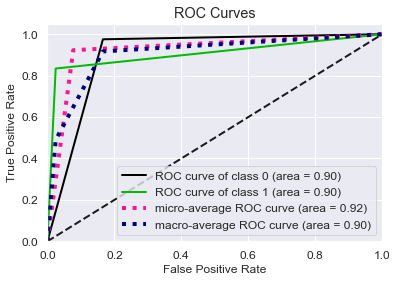

The confusion matrix of this classifier is
 [[278   7]
 [ 28 141]] 

The ROC of this classifier is


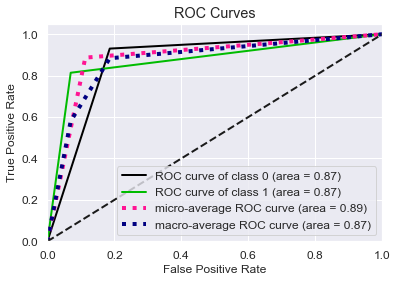

The confusion matrix of this classifier is
 [[67  5]
 [ 8 35]] 



In [477]:
report2(cancer_data_y_train_sc, cancer_data_y_train_pred, cancer_data_y_train_proba)
report2(cancer_data_y_test_sc, cancer_data_y_test_pred, cancer_data_y_test_proba)

In [467]:
def cancer_result_sc(cancer_data_X_train_sc, cancer_data_X_test_sc, cancer_data_y_train_sc, cancer_data_y_test_sc):
    sc = SpectralClustering(n_clusters=2, gamma=0.01, n_jobs=-1)
    cancer_data_y_train_cluster = pd.Series(sc.fit_predict(cancer_data_X_train_sc))
    cluster_index_0 = cancer_data_y_train_cluster[cancer_data_y_train_cluster.isin([0])].index
    cluster_index_1 = cancer_data_y_train_cluster[cancer_data_y_train_cluster.isin([1])].index
    cluster_data_y_cluster_0 = cancer_data_y_train_sc.loc[cluster_index_0]
    cluster_data_y_cluster_1 = cancer_data_y_train_sc.loc[cluster_index_1]
    cluster_name_0 = pd.Series(cluster_data_y_cluster_0.iloc[:,0]).value_counts().idxmax()
    cluster_name_1 = pd.Series(cluster_data_y_cluster_1.iloc[:,0]).value_counts().idxmax()
    cancer_data_y_train_pred = cancer_data_y_train_cluster.replace([0,1],[cluster_name_0,cluster_name_1])
    
    sc = SpectralClustering(n_clusters=2, gamma=0.14, n_jobs=-1)
    cancer_data_y_test_cluster = pd.Series(sc.fit_predict(cancer_data_X_test_sc))
    cluster_index_0_test = cancer_data_y_test_cluster[cancer_data_y_test_cluster.isin([0])].index
    cluster_index_1_test = cancer_data_y_test_cluster[cancer_data_y_test_cluster.isin([1])].index
    cluster_data_y_cluster_0_test = cancer_data_y_test_sc.loc[cluster_index_0_test]
    cluster_data_y_cluster_1_test = cancer_data_y_test_sc.loc[cluster_index_1_test]
    cluster_name_0_test = pd.Series(cluster_data_y_cluster_0_test.iloc[:,0]).value_counts().idxmax()
    cluster_name_1_test = pd.Series(cluster_data_y_cluster_1_test.iloc[:,0]).value_counts().idxmax()
    cancer_data_y_test_pred = cancer_data_y_test_cluster.replace([0,1],[cluster_name_0_test,cluster_name_1_test])
    
    # report the average scores
    cancer_result_train = report1(cancer_data_y_train_sc, cancer_data_y_train_pred)
    cancer_result_test = report1(cancer_data_y_test_sc, cancer_data_y_test_pred)
    cancer_result_sc = cancer_result_train.append(cancer_result_test)
    
    return(cancer_result_sc)

In [468]:
cancer_result_sc(cancer_X_train_normalized, cancer_X_test_normalized, cancer_y_train, cancer_y_test)

0    0.922907
1    0.952703
2    0.834320
3    0.889590
4    0.904879
0    0.886957
1    0.875000
2    0.813953
3    0.843373
4    0.872255
dtype: float64

In [469]:
cancer_result_list_sc =[]
for i in range(30):
    cancer_result_list_sc.append(cancer_result_sc(cancer_X_train_normalized, cancer_X_test_normalized, cancer_y_train, cancer_y_test))
    

In [471]:
# combine each results of report1 for the 30-time iterations
cancer_svc_sc_report1 = pd.concat(cancer_result_list_sc, axis=1).T
cancer_svc_sc_report1_columns = ['cancer_train_accuracy', 'cancer_train_precision', 'cancer_train_recall', 'cancer_train_fscore', 'cancer_train_AUC',
                          'cancer_test_accuracy', 'cancer_test_precision', 'cancer_test_recall', 'cancer_test_fscore', 'cancer_test_AUC']
cancer_svc_sc_report1.columns = cancer_svc_sc_report1_columns
cancer_svc_sc_report1


,cancer_train_accuracy,cancer_train_precision,cancer_train_recall,cancer_train_fscore,cancer_train_AUC,cancer_test_accuracy,cancer_test_precision,cancer_test_recall,cancer_test_fscore,cancer_test_AUC
0,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
1,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
2,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
3,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
4,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
5,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
6,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
7,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
8,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255
9,0.922907,0.952703,0.83432,0.88959,0.904879,0.886957,0.875,0.813953,0.843373,0.872255


In [478]:
# average scores of training and test set
for i in range(10):
    print('The average of', cancer_svc_sc_report1.columns[i], 'is', cancer_svc_sc_report1.iloc[:, i].mean())


The average of cancer_train_accuracy is 0.922907488986784
The average of cancer_train_precision is 0.9527027027027024
The average of cancer_train_recall is 0.834319526627219
The average of cancer_train_fscore is 0.8895899053627759
The average of cancer_train_AUC is 0.9048790615592238
The average of cancer_test_accuracy is 0.88695652173913
The average of cancer_test_precision is 0.875
The average of cancer_test_recall is 0.8139534883720928
The average of cancer_test_fscore is 0.8433734939759036
The average of cancer_test_AUC is 0.8722545219638247


### v. Compair the algorethms

From the reports I got in previous cells, those three approaches did a really good job on the breast cancer dataset. The predictive accuracy scores are nearly 1, and the mispredicted data numbers is quite small. 

However, slightly differences exist. The result from supervised learning is better than that from semi-supervised learning, and the result from semi-supervised learning is better than that from unsupervised learning.

It is not surprising that the more data we are confident with, the better classifier we will train.

# 2. Active Learning Using Support Vector Machines

## (a) Pre-processing

In [6]:
# import raw data
bank_rawdata = pd.read_csv('./data_banknote_authentication.csv', names = ['variance', 'skewness', 'curtosis', 'entropy', 'class'])
bank_rawdata.head(3)

,variance,skewness,curtosis,entropy,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [7]:
# adjust the label to the first column
bank_rawdata = bank_rawdata[['class', 'variance', 'skewness', 'curtosis', 'entropy']]
bank_rawdata.head(3)

,class,variance,skewness,curtosis,entropy
0,0,3.6216,8.6661,-2.8073,-0.44699
1,0,4.5459,8.1674,-2.4586,-1.46210
2,0,3.8660,-2.6383,1.9242,0.10645


In [8]:
# create a function to deal with selected training data
def transport_selected_data(sample, samplefrom, sampleto):
    sample_index = list(sample.index)
    samplefrom = samplefrom.drop(sample_index, axis=0)
    sampleto = sampleto.append(sample)
    
    a = np.int64(sampleto.iloc[:,0])
    sampleto.iloc[:,0] = a
    
    return(samplefrom, sampleto)

## (b) SVM

### i passive learning

In [373]:
def passive_learning(bank_rawdata):
    # generate data
    bank_train_pl, bank_test = train_test_split(bank_rawdata, test_size = 472)
    bank_X_test, bank_y_test = split_X_y(bank_test)
    
    bank_train_pl_train = pd.DataFrame(columns=['class', 'variance', 'skewness', 'curtosis', 'entropy'])
    bank_test_error_pl_list = []
    
    # randomly select 10 training points
    bank_train_pl_sample = bank_train_pl.sample(n = 10)
    # check class containing two values
    while(bank_train_pl_sample['class'].value_counts()[0] == 10):
        bank_train_pl_sample = bank_train_pl.sample(n = 10)
    bank_train_pl, bank_train_pl_train = transport_selected_data(bank_train_pl_sample, bank_train_pl, bank_train_pl_train)
    
    best_svc = svc(bank_train_pl_train)
    # test error
    bank_test_error = 1 - best_svc.score(bank_X_test, bank_y_test)
    bank_test_error_pl_list.append(bank_test_error)
    
    # next 89 times
    while(bank_train_pl.empty == False):
        # randomly select 10 training points
        bank_train_pl_sample = bank_train_pl.sample(n = 10)
        bank_train_pl, bank_train_pl_train = transport_selected_data(bank_train_pl_sample, bank_train_pl, bank_train_pl_train)
        best_svc = svc(bank_train_pl_train,cv=10)
        bank_test_error = 1 - best_svc.score(bank_X_test, bank_y_test)
        bank_test_error_pl_list.append(bank_test_error)
    
    return(bank_test_error_pl_list)

In [374]:
bank_test_error_pl_lists = []
for i in range(50):
    l1 = passive_learning(bank_rawdata)
    bank_test_error_pl_lists.append(l1)

In [376]:
len(bank_test_error_pl_lists)

50

In [382]:
bank_test_error_points = list(range(10, 901, 10))

In [383]:
bank_test_error_pl_df = pd.DataFrame(bank_test_error_pl_lists, columns=bank_test_error_points)

In [387]:
bank_test_error_pl_df

,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.078390,0.055085,0.031780,0.033898,0.046610,0.023305,0.029661,0.038136,0.038136,0.016949,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.165254,0.057203,0.084746,0.057203,0.023305,0.010593,0.014831,0.014831,0.027542,0.025424,...,0.010593,0.006356,0.006356,0.010593,0.006356,0.006356,0.006356,0.006356,0.006356,0.012712
2,0.199153,0.199153,0.076271,0.052966,0.048729,0.038136,0.042373,0.042373,0.042373,0.042373,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
3,0.076271,0.074153,0.038136,0.038136,0.038136,0.029661,0.029661,0.029661,0.036017,0.031780,...,0.014831,0.012712,0.012712,0.012712,0.012712,0.012712,0.014831,0.014831,0.014831,0.014831
4,0.120763,0.036017,0.038136,0.038136,0.033898,0.021186,0.012712,0.019068,0.016949,0.023305,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
5,0.144068,0.086864,0.044492,0.038136,0.040254,0.029661,0.029661,0.029661,0.029661,0.029661,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
6,0.161017,0.097458,0.057203,0.084746,0.025424,0.025424,0.012712,0.012712,0.016949,0.016949,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.012712,0.016949,0.016949,0.012712,0.012712
7,0.050847,0.042373,0.042373,0.044492,0.029661,0.023305,0.023305,0.023305,0.027542,0.023305,...,0.016949,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,0.016949,0.016949,0.012712
8,0.131356,0.133475,0.033898,0.033898,0.019068,0.014831,0.014831,0.010593,0.010593,0.012712,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.016949,0.016949,0.016949,0.016949,0.016949
9,0.033898,0.025424,0.019068,0.016949,0.033898,0.014831,0.004237,0.004237,0.004237,0.004237,...,0.012712,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.010593,0.012712


### ii active learning

In [404]:
# create a function to select the most closest 10 data points
def closest_10_points(best_svc, bank_train_al):
    distances = best_svc.decision_function(bank_train_al.iloc[:,1:])
    distances_abs = abs(distances)
    distances_series = pd.Series(distances_abs, index = bank_train_al.index)
    distances_series_sorted = distances_series.sort_values(ascending=True)
    closest_10_points_index = distances_series_sorted.iloc[:10].index
    closest_10_points = bank_train_al.loc[closest_10_points_index,:]
    return(closest_10_points)

In [419]:
def active_learning(bank_rawdata):
    # generate data
    bank_train_al, bank_test = train_test_split(bank_rawdata, test_size = 472)
    while(bank_train_al['class'].value_counts()[0] == 900):
        bank_train_al, bank_test = train_test_split(bank_rawdata, test_size = 472)
    bank_X_test, bank_y_test = split_X_y(bank_test)
    
    bank_train_al_train = pd.DataFrame(columns=['class', 'variance', 'skewness', 'curtosis', 'entropy'])
    bank_test_error_al_list = []
    
    # randomly select 10 training points
    bank_train_al_sample = bank_train_al.sample(n = 10)
    # check class containing two values
    while(bank_train_al_sample['class'].value_counts()[0] >= 8):
        bank_train_al_sample = bank_train_al.sample(n = 10)
    bank_train_al, bank_train_al_train = transport_selected_data(bank_train_al_sample, bank_train_al, bank_train_al_train)
    
#     print(bank_train_al_sample['class'].value_counts(),'\n')
    
    best_svc = svc(bank_train_al_train)
    # test error
    bank_test_error = 1 - best_svc.score(bank_X_test, bank_y_test)
    bank_test_error_al_list.append(bank_test_error)
    
    # next 89 times
    while(bank_train_al.empty == False):
        # randomly select 10 training points
        bank_train_al_sample = closest_10_points(best_svc, bank_train_al)
        bank_train_al, bank_train_al_train = transport_selected_data(bank_train_al_sample, bank_train_al, bank_train_al_train)
        best_svc = svc(bank_train_al_train,cv=10)
        bank_test_error = 1 - best_svc.score(bank_X_test, bank_y_test)
        bank_test_error_al_list.append(bank_test_error)
    
    return(bank_test_error_al_list)


In [420]:
bank_test_error_al_lists = []
for i in range(50):
    l1 = active_learning(bank_rawdata)
    bank_test_error_al_lists.append(l1)

In [421]:
len(bank_test_error_pl_lists)

50

In [422]:
bank_test_error_al_df = pd.DataFrame(bank_test_error_al_lists, columns=bank_test_error_points)
bank_test_error_al_df


,10,20,30,40,50,60,70,80,90,100,...,810,820,830,840,850,860,870,880,890,900
0,0.093220,0.016949,0.065678,0.010593,0.010593,0.010593,0.014831,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.014831,0.014831,0.014831,0.014831,0.014831,0.012712,0.012712
1,0.169492,0.052966,0.141949,0.023305,0.052966,0.040254,0.019068,0.014831,0.016949,0.014831,...,0.014831,0.014831,0.014831,0.014831,0.014831,0.014831,0.021186,0.021186,0.021186,0.021186
2,0.084746,0.014831,0.019068,0.008475,0.004237,0.004237,0.008475,0.006356,0.006356,0.006356,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
3,0.057203,0.023305,0.029661,0.014831,0.010593,0.010593,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
4,0.019068,0.042373,0.021186,0.025424,0.014831,0.014831,0.012712,0.016949,0.016949,0.012712,...,0.016949,0.016949,0.016949,0.016949,0.016949,0.012712,0.016949,0.016949,0.012712,0.016949
5,0.067797,0.023305,0.025424,0.010593,0.010593,0.010593,0.012712,0.012712,0.010593,0.010593,...,0.010593,0.010593,0.014831,0.014831,0.014831,0.010593,0.014831,0.014831,0.014831,0.014831
6,0.116525,0.040254,0.031780,0.023305,0.012712,0.004237,0.006356,0.010593,0.010593,0.010593,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.063559,0.008475,0.010593,0.004237,0.008475,0.012712,0.012712,0.012712,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
8,0.010593,0.042373,0.029661,0.004237,0.006356,0.004237,0.036017,0.008475,0.004237,0.004237,...,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356,0.006356
9,0.322034,0.076271,0.021186,0.072034,0.023305,0.004237,0.002119,0.002119,0.014831,0.019068,...,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186,0.021186


## (c) test errors comparision between passive learning and active learning

In [423]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt


In [432]:
# prepare data for plot

avg_pl = list(bank_test_error_pl_df.mean())
bank_test_error_pl_avg = pd.DataFrame([bank_test_error_points, avg_pl]).T
bank_test_error_pl_avg.columns = ['data points number', 'average test error']
bank_test_error_pl_avg['approach'] = 'passive learning'
    
avg_al = list(bank_test_error_al_df.mean())
bank_test_error_al_avg = pd.DataFrame([bank_test_error_points, avg_al]).T
bank_test_error_al_avg.columns = ['data points number', 'average test error']
bank_test_error_al_avg['approach'] = 'active learning'

# combine the two dataframes
bank_test_error_df = bank_test_error_pl_avg.append(bank_test_error_al_avg)
bank_test_error_df.shape


(180, 3)

#### Report

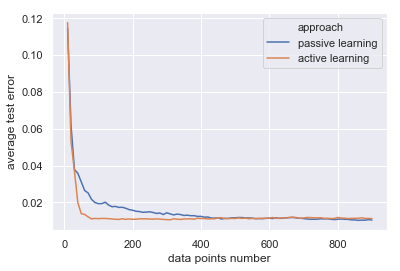

In [435]:
ax = sns.lineplot(x = 'data points number', y = "average test error", hue="approach", data=bank_test_error_df)